# CS3540 Final Project: Stock Market Technical Analysis

- Goal: 

In [36]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot

import plotly.graph_objs as go
from numpy.random import normal, seed

import math
# from sklearn.metrics import mean_squared_error

from datetime import datetime, timedelta

from yahoofinancials import YahooFinancials
from joblib import Memory

In [10]:
print(os.listdir("Data"))

['ETFs', 'Stocks']


In [11]:
data = pd.read_csv('Data/Stocks/aapl.us.txt')
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0


In [12]:
TMPDIR = '/tmp'
memory = Memory(TMPDIR, verbose=0)

In [13]:
@memory.cache
def get_ticker_data(ticker: str, param_start_date, param_end_date) -> dict:
    raw_data = YahooFinancials(ticker)
    return raw_data.get_historical_price_data(param_start_date, param_end_date, "daily").copy()

def fetch_ticker_data(ticker: str, start_date, end_date) -> pd.DataFrame:
    date_range = pd.bdate_range(start=start_date, end=end_date)
    values = pd.DataFrame({'Date': date_range})
    values['Date'] = pd.to_datetime(values['Date'])
    raw_data = get_ticker_data(ticker, start_date, end_date)
    return pd.DataFrame(raw_data[ticker]["prices"])[['date', 'open', 'high', 'low', 'adjclose', 'volume']]    

In [14]:
DATASET_SOURCE = 'LIVE' # or 'COMPETITION_DATASET'
start_date = '2006-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')

In [15]:
if DATASET_SOURCE == 'LIVE':
    microsoft = fetch_ticker_data('MSFT', start_date, end_date)
    microsoft.columns = ['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume']
    microsoft['DateTime'] = microsoft['DateTime'].apply(lambda x: datetime.fromtimestamp(x))
    microsoft = microsoft.fillna(method="ffill", axis=0)
    microsoft = microsoft.fillna(method="bfill", axis=0)
    microsoft = microsoft.set_index('DateTime')    
# else:
#     microsoft = pd.read_csv('../input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/msft.us.txt', index_col='Date', parse_dates=['Date'])
#     microsoft = microsoft['2006':]

microsoft['Name'] = 'MSFT'
microsoft.head()

,Open,High,Low,Close,Volume,Name
DateTime,,,,,,
2006-01-03 09:30:00,26.250000,27.000000,26.10,18.959040,79973000,MSFT
2006-01-04 09:30:00,26.770000,27.080000,26.77,19.050858,57975600,MSFT
2006-01-05 09:30:00,26.959999,27.129999,26.91,19.064997,48245500,MSFT
2006-01-06 09:30:00,26.889999,27.000000,26.49,19.008478,100963000,MSFT
2006-01-09 09:30:00,26.930000,27.070000,26.76,18.973164,55625000,MSFT


In [16]:
if DATASET_SOURCE == 'LIVE':
    apple = fetch_ticker_data('AAPL', start_date, end_date)
    apple.columns = ['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume']
    apple['DateTime'] = apple['DateTime'].apply(lambda x: datetime.fromtimestamp(x))
    apple = apple.fillna(method="ffill", axis=0)
    apple = apple.fillna(method="bfill", axis=0)
    apple = apple.set_index('DateTime')     
# else:
#     apple = pd.read_csv('../input/stock-time-series-20050101-to-20171231/AAPL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

apple['Name'] = 'AAPL'
apple.head()

,Open,High,Low,Close,Volume,Name
DateTime,,,,,,
2006-01-03 09:30:00,2.585000,2.669643,2.580357,2.260118,807234400,AAPL
2006-01-04 09:30:00,2.683214,2.713571,2.660714,2.266770,619603600,AAPL
2006-01-05 09:30:00,2.672500,2.675000,2.633929,2.248931,449422400,AAPL
2006-01-06 09:30:00,2.687500,2.739286,2.662500,2.306983,704457600,AAPL
2006-01-09 09:30:00,2.740357,2.757143,2.705000,2.299424,675040800,AAPL


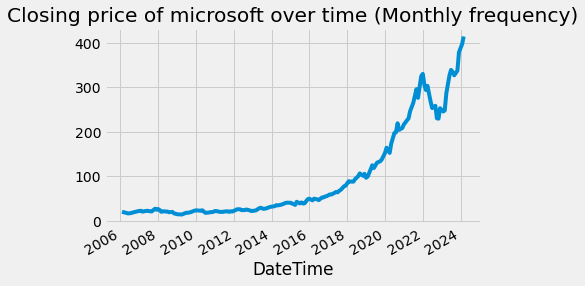

In [18]:
microsoft["Close"].asfreq('M').interpolate().plot() 
plt.title('Closing price of microsoft over time (Monthly frequency)')
plt.show()

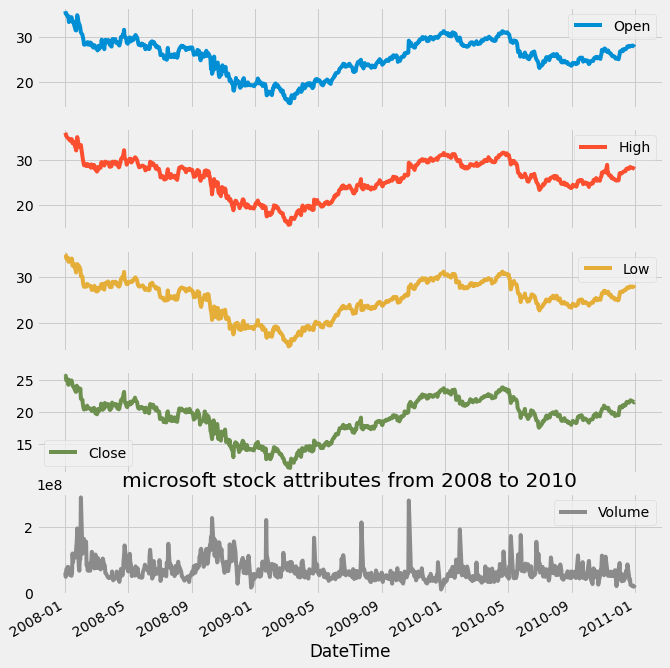

In [17]:
microsoft['2008':'2010'].plot(subplots=True, figsize=(10,12))
plt.title('microsoft stock attributes from 2008 to 2010')
plt.savefig('microsoft.png')
plt.show()